# Titanic Dataset: Exploratory Data Analysis

```{figure} img/titanic.jpg
---
height: 500px
name: titanic-fig
---
Titanic Image downloaded from [wikimedia](https://commons.wikimedia.org/wiki/File:RMS_Titanic_4.jpg).
```

This is an EDA of the famous Titanic (shown in {numref}`titanic-fig`) dataset from Kaggle. Through EDA, I will  try to achive the following goals:

1. Investigate the demographic characteristics of the Titanic's passengers, such as their age, gender, and social class, to gain a better understanding of the composition of the passenger list.

2. Explore the origins of the Titanic's passengers, including their countries of origin, to gain a better understanding of the cultural diversity of the passenger list.

3. Determine which passengers traveled with their families and which ones traveled alone to gain insights into the social dynamics of the passengers.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset.
titanic_df = pd.read_csv('data/titanic_train.csv')
# preview your dataset
titanic_df.head() 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# information about the dataset. 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


## Demographic characteristics of the Titanic's passengers

Let's look at some demographical information about the passengers.

Let's take a look at socio-economic class of a person (Pclass column) 



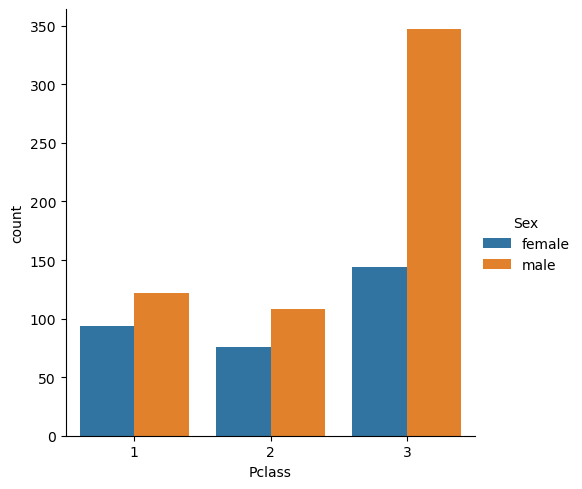

In [12]:
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')


Let's explore passangers' gender:

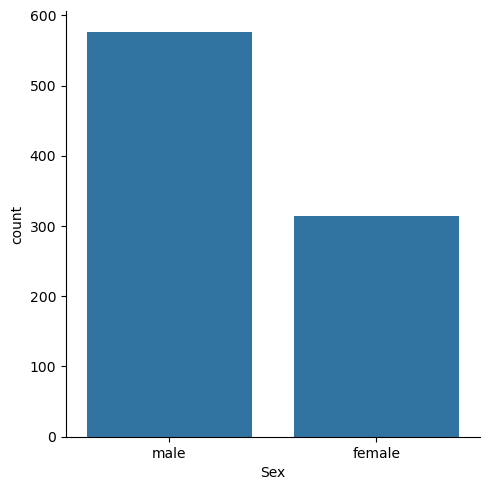

In [5]:
# number of male and female passengers
sns.catplot(x='Sex',data=titanic_df,kind='count')

Figure summary: there were considerably more male passengers onboard. 

__*Note: It is important to acknowledge that gender is not binary and that there are many individuals who do not identify as strictly male or female. However, the dataset available for the Titanic passengers only includes information on male and female passengers. While this limitation may not fully capture the diversity of gender identities among the passengers, it is still valuable in providing insights into the demographics and social dynamics of the Titanic's passengers.*__


Let's now figure out how many kids were on the Titanic:

In [6]:
# function to create category child
def child(df):
    sex=df['Sex']
    age=df['Age']
    
    return 'child' if age < 16 else sex

# create a new column "Individuals"
titanic_df['Individuals'] = titanic_df.apply(child,axis=1)
# see counts
print(titanic_df['Individuals'].value_counts())

Individuals
male      537
female    271
child      83
Name: count, dtype: int64


Now, let's check teh distribution of men, women and children belonging to different socio-economic classes.

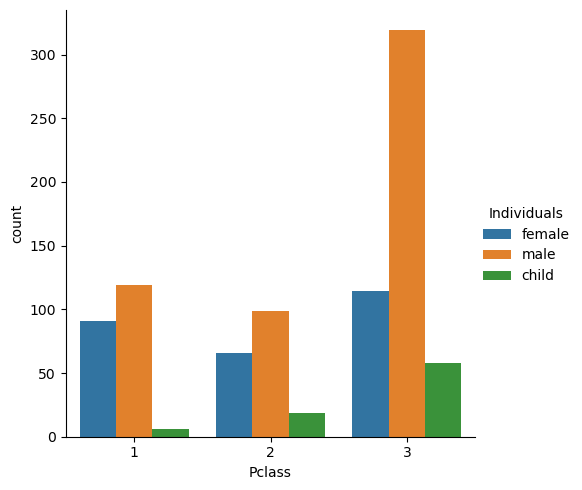

In [7]:
sns.catplot(x='Pclass',data=titanic_df,hue='Individuals',kind='count')

Figure summary: There are way more male passengers than woman or childeren in the 3rd class than in any other class.

Let's check out how the age distribution varies for different classes

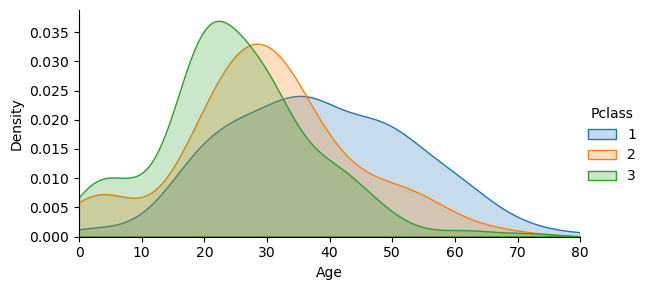

In [8]:
age_class = sns.FacetGrid(titanic_df,hue='Pclass',aspect=2)
age_class.map(sns.kdeplot,'Age',fill=True)
oldest = titanic_df['Age'].max()
age_class.set(xlim=(0,oldest))
age_class.add_legend()

Figure summary: first class passengers were older that passagenrs of other class

## Explore the origins of the Titanic's passengers

The __Embarked__ columns are abbreviation of the following port of embarkation:

- C = Cherbourg
- Q = Queenstown
- S = Southampton 

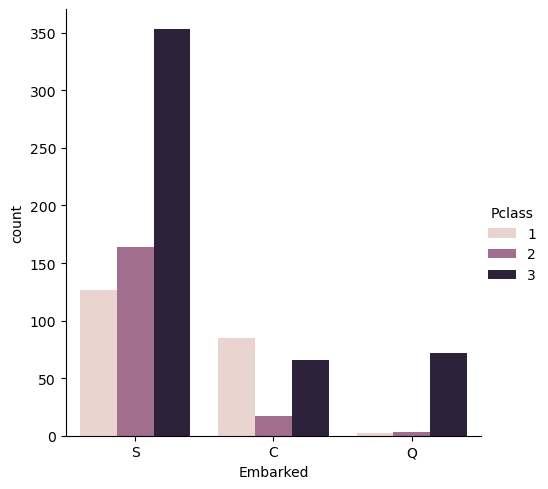

In [9]:
sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count')

Figure summary: Most of the 3rd class passengers embarked from Southampton

## Determine which passengers traveled with their families

we need 2 columns:

- __SibsSP__ : number of siblings or spouses that a passenger had aboard.
- __Parch__ : number of parents or children someone had on the ship.

We can combine teh column to determine whetehr the passanger was alone or with someone and record in in __ModeofTravel__ column:

In [10]:
#Adding the number of family a passenger had onboard
titanic_df['ModeofTravel'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['ModeofTravel'] = titanic_df['ModeofTravel'].apply(lambda x: 'With Someone' if x > 0 else 'Alone')

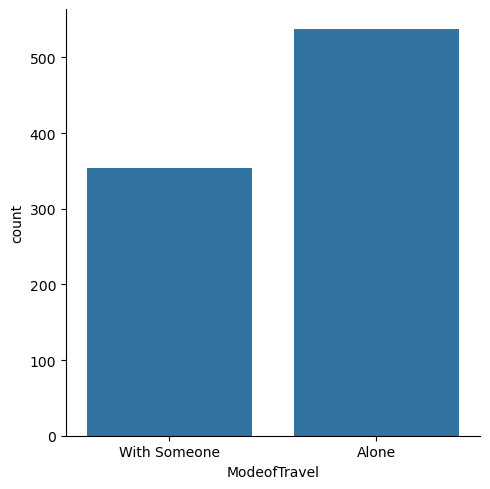

In [11]:
sns.catplot(x='ModeofTravel',data=titanic_df,kind='count')

Figure summary: The majority of people on the ship travled with someone. 